a)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

n=1000
K=5

#K-sparse vector of fourier coef
Psi = dct(np.identity(n))
s=np.zeros(n)
for i in range(K+1):
    s[np.random.randint(0,n-1)]=i-.2*i
#x=Psi@s

In [25]:
def L1_norm(x):
        return np.linalg.norm(x,ord=1)
    
avg_err=np.zeros(3)
avg_err1=np.zeros(3)
avg_err0=np.zeros(3)
count=0
for p in [1,50,100]:
    err=np.zeros(3)
    err1=np.zeros(3)
    err0=np.zeros(3)

    for i in range(3):
        C = np.random.randn(p,n)
        Theta=C@Psi
        y=Theta@s

        y = y.reshape(-1)
        constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
        x0 = np.linalg.pinv(Theta) @ y
        res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
        s_hat = res.x
        err[i]=np.linalg.norm(s_hat-s)/np.linalg.norm(s)
        err1[i]=np.linalg.norm(s_hat-s,ord=1)/np.linalg.norm(s,ord=1)
        err0[i]=np.linalg.norm(s_hat-s,ord=0)/np.linalg.norm(s,ord=0)
    avg_err[count]=np.mean(err)
    avg_err1[count]=np.mean(err1)
    avg_err0[count]=np.mean(err0)
    count+=1

Text(0.5, 0, 'p from 1->100')

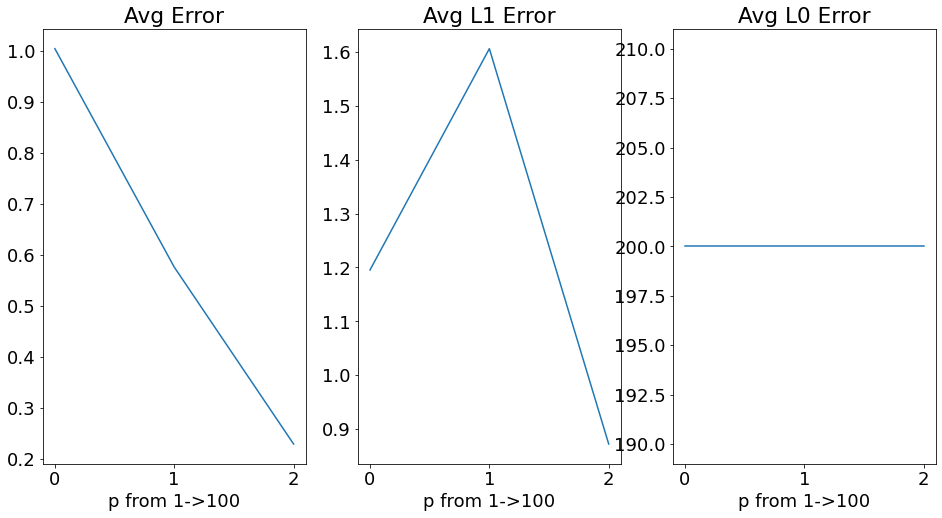

In [32]:
fig,ax=plt.subplots(1,3)
ax[0].plot(avg_err)
ax[0].set_title('Avg Error')
ax[0].set_xlabel('p from 1->100')
ax[1].plot(avg_err1)
ax[1].set_title('Avg L1 Error')
ax[1].set_xlabel('p from 1->100')
ax[2].plot(avg_err0)
ax[2].set_title('Avg L0 Error')
ax[2].set_xlabel('p from 1->100')

b)

In [35]:
K_count=0
for K in [1,10,20]:
    s=np.zeros(n)
    for i in range(K+1):
        s[np.random.randint(0,n-1)]=i-.2*i

    avg_err=np.zeros((3,3))
    avg_err1=np.zeros((3,3))
    avg_err0=np.zeros((3,3))
    count=0
    for p in [1,50,100]:
        err=np.zeros(3)
        err1=np.zeros(3)
        err0=np.zeros(3)

        for i in range(3):
            C = np.random.randn(p,n)
            Theta=C@Psi
            y=Theta@s

            y = y.reshape(-1)
            constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
            x0 = np.linalg.pinv(Theta) @ y
            res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
            s_hat = res.x
            err[i]=np.linalg.norm(s_hat-s)/np.linalg.norm(s)
            err1[i]=np.linalg.norm(s_hat-s,ord=1)/np.linalg.norm(s,ord=1)
            err0[i]=np.linalg.norm(s_hat-s,ord=0)/np.linalg.norm(s,ord=0)
        avg_err[K_count,count]=np.mean(err)
        avg_err1[K_count,count]=np.mean(err1)
        avg_err0[K_count,count]=np.mean(err0)
        count+=1
    K_count+=1